# qbz95 User Guide

In [ ]:
import sys

base_path = '/tf/eipi10/qbz95'
sys.path.append(base_path)

from qbz95 import config
import pandas as pd
config = config.get_config('jupyter')
pd.set_option('display.width', 1000)

%matplotlib inline

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload


## 1. 数据

### MNIST

#### 下载数据

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image
from qbz95.ml3.utils.data.datasets import MNIST

mnist_path = os.path.join(base_path, 'data/mnist')
train_data_path, train_label_path, test_data_path, test_label_path = MNIST.download(mnist_path)
print(train_data_path)

#### 获取数据集


In [ ]:
def show_images(images, num=10, cols=5):
    rows = math.ceil(num / cols)
    for i in range(num):
        img, label = images[i]
        ax = plt.subplot(rows, cols, i+1)
        ax.set_title(label)
        ax.axis('off')    
        ax.imshow(img) 

    plt.tight_layout()
    plt.show()

def print_image_property(image):
    print('format={}, size={}, mode={}'.format(image.format, image.size, image.mode))

In [ ]:
train_data = MNIST.extract_data(train_data_path, 60000)
train_label = MNIST.extract_label(train_label_path, 60000)
print(train_data.shape)

# 其中的关键是np.uint8。由于灰度的图片最大值是8位二进制。
train_images = [(Image.fromarray(img.astype(np.uint8), 'L'), label) for img, label in zip(train_data, train_label)]
print_image_property(train_images[0][0])

show_images(train_images)

下面和torch中内置的MNIST进行比较

format=None, size=(28, 28), mode=L


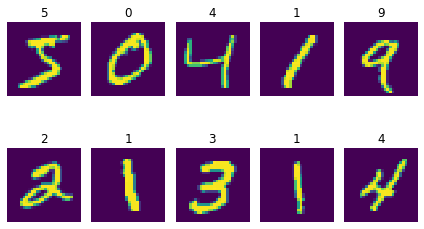

In [12]:
import torch
import torchvision

mnist_dataset = torchvision.datasets.MNIST(mnist_path, train=True, download=True)

print_image_property(mnist_dataset[0][0])
show_images(mnist_dataset)

img_array1 = np.asarray(train_images[0][0])
img_array2 = np.asarray(mnist_dataset[0][0])
np.testing.assert_array_equal(img_array1, img_array2)

自定义数据集MNIST和torch的MNIST比较

2020-02-26 00:06:34,132: INFO: Extracting /tf/eipi10/qbz95/data/mnist/train-labels-idx1-ubyte.gz
2020-02-26 00:06:34,134: INFO: Extracting /tf/eipi10/qbz95/data/mnist/train-images-idx3-ubyte.gz


format=None, size=(28, 28), mode=L


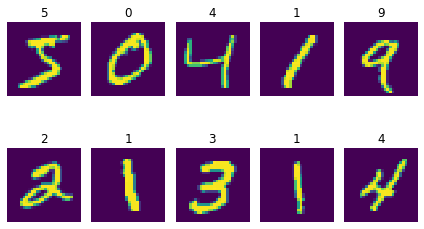

In [11]:
my_mnist_dataset = MNIST(mnist_path, train=True)

print_image_property(my_mnist_dataset[0][0])
show_images(my_mnist_dataset)

img_array3 = np.asarray(my_mnist_dataset[0][0])
np.testing.assert_array_equal(img_array2, img_array3)